## Import packages

In [1]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install -U seaborn

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import numpy as np
import plotly
from matplotlib import pyplot as plt
import pandas.plotting
import scipy
from scipy import stats
import seaborn as sns

## Load Data

In [5]:
netflix_titles = pd.read_csv("/Users/kenyashiafernandez/Documents/GitHub/Final-Project/Data/netflix_titles_nov_2019.csv")
netflix_titles.head()

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type
0,81193313,Chocolate,NaN,"Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...",South Korea,"November 30, 2019",2019,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman...",Brought together by meaningful meals in the pa...,TV Show
1,81197050,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,NaN,"November 30, 2019",2019,TV-G,67 min,"Documentaries, International Movies","From Sierra de las Minas to Esquipulas, explor...",Movie
2,81213894,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",India,"November 30, 2019",2019,TV-14,135 min,"Comedies, Dramas, International Movies",A goofy copywriter unwittingly convinces the I...,Movie
3,81082007,Atlantics,Mati Diop,"Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...","France, Senegal, Belgium","November 29, 2019",2019,TV-14,106 min,"Dramas, Independent Movies, International Movies","Arranged to marry a rich man, young Ada is cru...",Movie
4,80213643,Chip and Potato,NaN,"Abigail Oliver, Andrea Libman, Briana Buckmast...","Canada, United Kingdom",NaN,2019,TV-Y,2 Seasons,Kids' TV,"Lovable pug Chip starts kindergarten, makes ne...",TV Show


In [6]:
netflix_recode = pd.read_csv('/Users/kenyashiafernandez/Documents/GitHub/Final-Project/Data/netflix_recode.csv')
netflix_recode.head()

,Unnamed: 0,id,title,type,description,release_year,age_certification,runtime,production_countries,seasons,...,thriller,crime,comedy,documentation,fantasy,scifi,romance,horror,history,music
0,0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,['US'],1.0,...,0,0,0,1,0,0,0,0,0,0
1,1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,['US'],NaN,...,0,1,0,0,0,0,0,0,0,0
2,2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,['US'],NaN,...,1,0,0,0,0,0,0,0,0,0
3,3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,['GB'],NaN,...,0,0,1,0,1,0,0,0,0,0
4,4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,NaN,150,"['GB', 'US']",NaN,...,0,0,0,0,0,0,0,0,0,0


In [7]:
netflix_recode.isnull().sum()

Unnamed: 0                 0
id                         0
title                      1
type                       0
description               18
release_year               0
age_certification       2619
runtime                    0
production_countries       0
seasons                 3744
imdb_id                  403
imdb_score               482
imdb_votes               498
tmdb_popularity           91
tmdb_score               311
drama                      0
sport                      0
war                        0
animation                  0
family                     0
action                     0
western                    0
european                   0
reality                    0
thriller                   0
crime                      0
comedy                     0
documentation              0
fantasy                    0
scifi                      0
romance                    0
horror                     0
history                    0
music                      0
dtype: int64

In [8]:
new_netflix = pd.merge(netflix_titles,netflix_recode,on = 'title', how = 'outer')
new_netflix.head()

,show_id,title,director,cast,country,date_added,release_year_x,rating,duration,listed_in,...,thriller,crime,comedy,documentation,fantasy,scifi,romance,horror,history,music
0,81193313.0,Chocolate,NaN,"Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...",South Korea,"November 30, 2019",2019.0,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman...",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,81197050.0,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,NaN,"November 30, 2019",2019.0,TV-G,67 min,"Documentaries, International Movies",...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,81213894.0,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",India,"November 30, 2019",2019.0,TV-14,135 min,"Comedies, Dramas, International Movies",...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,81082007.0,Atlantics,Mati Diop,"Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...","France, Senegal, Belgium","November 29, 2019",2019.0,TV-14,106 min,"Dramas, Independent Movies, International Movies",...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,80213643.0,Chip and Potato,NaN,"Abigail Oliver, Andrea Libman, Briana Buckmast...","Canada, United Kingdom",NaN,2019.0,TV-Y,2 Seasons,Kids' TV,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
new_netflix.isnull().sum()

show_id                 3616
title                      1
director                5538
cast                    4172
country                 4045
date_added              4267
release_year_x          3616
rating                  3626
duration                3616
listed_in               3616
description_x           3616
type_x                  3616
Unnamed: 0              3594
id                      3594
type_y                  3594
description_y           3612
release_year_y          3594
age_certification       6230
runtime                 3594
production_countries    3594
seasons                 7362
imdb_id                 4002
imdb_score              4082
imdb_votes              4098
tmdb_popularity         3685
tmdb_score              3909
drama                   3594
sport                   3594
war                     3594
animation               3594
family                  3594
action                  3594
western                 3594
european                3594
reality       

## Data Wrangling

### Removing unnecessary columns

In [10]:
new_netflix.drop(['description_x'], axis=1, inplace = True)
new_netflix.drop(['description_y'], axis=1, inplace = True)
new_netflix.drop(['music'], axis=1, inplace = True)
new_netflix.drop(['history'], axis=1, inplace = True)
new_netflix.drop(['horror'], axis=1, inplace = True)
new_netflix.drop(['romance'], axis=1, inplace = True)
new_netflix.drop(['scifi'], axis=1, inplace = True)
new_netflix.drop(['fantasy'], axis=1, inplace = True)
new_netflix.drop(['documentation'], axis=1, inplace = True)
new_netflix.drop(['comedy'], axis=1, inplace = True)
new_netflix.drop(['crime'], axis=1, inplace = True)
new_netflix.drop(['thriller'], axis=1, inplace = True)
new_netflix.drop(['reality'], axis=1, inplace = True)
new_netflix.drop(['european'], axis=1, inplace = True)
new_netflix.drop(['western'], axis=1, inplace = True)
new_netflix.drop(['action'], axis=1, inplace = True)
new_netflix.drop(['family'], axis=1, inplace = True)
new_netflix.drop(['animation'], axis=1, inplace = True)
new_netflix.drop(['war'], axis=1, inplace = True)
new_netflix.drop(['sport'], axis=1, inplace = True)
new_netflix.drop(['drama'], axis=1, inplace = True)
new_netflix.drop(['tmdb_score'], axis=1, inplace = True)
new_netflix.drop(['tmdb_popularity'], axis=1, inplace = True)
new_netflix.drop(['imdb_votes'], axis=1, inplace = True)
new_netflix.drop(['production_countries'], axis=1, inplace = True)
new_netflix.drop(['runtime'], axis=1, inplace = True)
new_netflix.drop(['age_certification'], axis=1, inplace = True)
new_netflix.drop(['seasons'], axis=1, inplace = True)
new_netflix.drop(['id'], axis=1, inplace = True)
new_netflix.drop(['Unnamed: 0'], axis=1, inplace = True)
new_netflix.drop(['date_added'], axis=1, inplace = True)

In [11]:
new_netflix.drop(['type_y'], axis=1, inplace = True)
new_netflix.drop(['release_year_y'], axis=1, inplace = True)
new_netflix.drop(['imdb_id'], axis=1, inplace = True)

In [12]:
new_netflix.head()

,show_id,title,director,cast,country,release_year_x,rating,duration,listed_in,type_x,imdb_score
0,81193313.0,Chocolate,NaN,"Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...",South Korea,2019.0,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman...",TV Show,NaN
1,81197050.0,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,NaN,2019.0,TV-G,67 min,"Documentaries, International Movies",Movie,6.6
2,81213894.0,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",India,2019.0,TV-14,135 min,"Comedies, Dramas, International Movies",Movie,4.3
3,81082007.0,Atlantics,Mati Diop,"Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...","France, Senegal, Belgium",2019.0,TV-14,106 min,"Dramas, Independent Movies, International Movies",Movie,6.7
4,80213643.0,Chip and Potato,NaN,"Abigail Oliver, Andrea Libman, Briana Buckmast...","Canada, United Kingdom",2019.0,TV-Y,2 Seasons,Kids' TV,TV Show,6.3


### Rename Columns

In [13]:
new_netflix.rename({'listed_in':'genre'}, axis = 1, inplace = True)
new_netflix.rename({'type_x':'type'}, axis = 1, inplace = True)
new_netflix.rename({'release_year_x':'release_year'}, axis = 1, inplace = True)
new_netflix

,show_id,title,director,cast,country,release_year,rating,duration,genre,type,imdb_score
0,81193313.0,Chocolate,NaN,"Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...",South Korea,2019.0,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman...",TV Show,NaN
1,81197050.0,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,NaN,2019.0,TV-G,67 min,"Documentaries, International Movies",Movie,6.6
2,81213894.0,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",India,2019.0,TV-14,135 min,"Comedies, Dramas, International Movies",Movie,4.3
3,81082007.0,Atlantics,Mati Diop,"Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...","France, Senegal, Belgium",2019.0,TV-14,106 min,"Dramas, Independent Movies, International Movies",Movie,6.7
4,80213643.0,Chip and Potato,NaN,"Abigail Oliver, Andrea Libman, Briana Buckmast...","Canada, United Kingdom",2019.0,TV-Y,2 Seasons,Kids' TV,TV Show,6.3
...,...,...,...,...,...,...,...,...,...,...,...
9488,NaN,Fine Wine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.8
9489,NaN,C/O Kaadhal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.7
9490,NaN,Lokillo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.8
9491,NaN,Dad Stop Embarrassing Me - The Afterparty,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Detect and Drop Na Values

In [14]:
new_netflix.isnull().sum()

show_id         3616
title              1
director        5538
cast            4172
country         4045
release_year    3616
rating          3626
duration        3616
genre           3616
type            3616
imdb_score      4082
dtype: int64

### Drop all null

In [15]:
new_netflix.dropna(inplace=True)

In [16]:
new_netflix.isnull().sum()

show_id         0
title           0
director        0
cast            0
country         0
release_year    0
rating          0
duration        0
genre           0
type            0
imdb_score      0
dtype: int64

## Save cleaned data as csv

In [17]:
new_netflix.to_csv("updated_cleaned_netflix_dataset.csv", index = False)

## Exploritory Data

In [18]:
netflix = pd.read_csv('/Users/kenyashiafernandez/Documents/GitHub/Final-Project/Data/updated_cleaned_netflix_dataset.csv')

In [19]:
netflix

,title,director,cast,country,release_year,rating,duration,genre,type,imdb_score
0,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",India,2019.0,TV-14,135 min,"Comedies, Dramas, International Movies",Movie,4.3
1,Atlantics,Mati Diop,"Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...","France, Senegal, Belgium",2019.0,TV-14,106 min,"Dramas, Independent Movies, International Movies",Movie,6.7
2,I Lost My Body,Jérémy Clapin,"Hakim Faris, Victoire Du Bois, Patrick d'Assum...",France,2019.0,TV-MA,81 min,"Dramas, Independent Movies, International Movies",Movie,7.5
3,Holiday Rush,Leslie Small,"Romany Malco, Sonequa Martin-Green, Darlene Lo...",United States,2019.0,TV-PG,94 min,"Children & Family Movies, Dramas",Movie,4.9
4,Evvarikee Cheppoddu,Basava Shankar Eeday,"Rakesh Varre, Gargeyi, Vamsi raj Nekkanti, D P...",India,2019.0,TV-14,134 min,"Comedies, International Movies, Romantic Movies",Movie,7.2
...,...,...,...,...,...,...,...,...,...,...
1135,Quiet Victory: The Charlie Wedemeyer Story,Roy Campanella II,"Pam Dawber, Michael Nouri, Bess Meyer, Peter B...",United States,1988.0,TV-PG,93 min,"Dramas, Sports Movies",Movie,7.2
1136,Strange Voices,Arthur Allan Seidelman,"Nancy McKeon, Valerie Harper, Stephen Macht, T...",United States,1987.0,NR,96 min,Dramas,Movie,6.3
1137,The Ryan White Story,John Herzfeld,"Judith Light, Lukas Haas, Michael Bowen, Nikki...",United States,1989.0,TV-PG,94 min,Dramas,Movie,7.2
1138,Unspeakable Acts,Linda Otto,"Jill Clayburgh, Brad Davis, Sam Behrens",United States,1990.0,NR,95 min,Dramas,Movie,6.1


In [20]:
netflix['release_year'] = netflix['release_year'].astype(int)

In [21]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1140 entries, 0 to 1139
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         1140 non-null   object 
 1   director      1140 non-null   object 
 2   cast          1140 non-null   object 
 3   country       1140 non-null   object 
 4   release_year  1140 non-null   int64  
 5   rating        1140 non-null   object 
 6   duration      1140 non-null   object 
 7   genre         1140 non-null   object 
 8   type          1140 non-null   object 
 9   imdb_score    1140 non-null   float64
dtypes: float64(1), int64(1), object(8)
memory usage: 89.2+ KB


In [22]:
netflix.to_csv('netflix_cleaned.csv', index = False)

In [23]:
netflix_current = pd.read_csv("/Users/kenyashiafernandez/Documents/GitHub/Final-Project/Code/netflix_cleaned.csv")

In [24]:
netflix_current.head(3)

,title,director,cast,country,release_year,rating,duration,genre,type,imdb_score
0,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",India,2019,TV-14,135 min,"Comedies, Dramas, International Movies",Movie,4.3
1,Atlantics,Mati Diop,"Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...","France, Senegal, Belgium",2019,TV-14,106 min,"Dramas, Independent Movies, International Movies",Movie,6.7
2,I Lost My Body,Jérémy Clapin,"Hakim Faris, Victoire Du Bois, Patrick d'Assum...",France,2019,TV-MA,81 min,"Dramas, Independent Movies, International Movies",Movie,7.5


### Top Countries where Netflix releases Movies/Shows

In [25]:
netflix_current.country.value_counts()

United States                  414
India                          236
Spain                           38
Philippines                     33
France                          20
                              ... 
Bangladesh                       1
New Zealand                      1
United States, Spain, Italy      1
United Kingdom, Malawi           1
Spain, Mexico, France            1
Name: country, Length: 172, dtype: int64

In [26]:
#United states has the most release at 493
netflix_current.country.str.contains('United States').value_counts()

False    647
True     493
Name: country, dtype: int64

In [27]:
netflix_current.country.str.contains('India').value_counts()

False    893
True     247
Name: country, dtype: int64

In [28]:
netflix_current.country.str.contains('United Kingdom').value_counts()

False    1081
True       59
Name: country, dtype: int64

In [29]:
netflix_current.country.str.contains('Canada').value_counts()

False    1094
True       46
Name: country, dtype: int64

### How many Movies vs Tv Shows?

In [30]:
netflix_current['type'].value_counts()
#Netflix releases more movies than tv shows

Movie      1115
TV Show      25
Name: type, dtype: int64

### What are the Top genres

In [31]:
netflix_current.genre.value_counts()

Stand-Up Comedy                                                   155
Comedies, Dramas, International Movies                             66
Dramas, International Movies                                       65
Dramas, Independent Movies, International Movies                   55
Dramas, International Movies, Thrillers                            41
                                                                 ... 
Documentaries, Faith & Spirituality, International Movies           1
Dramas, Sci-Fi & Fantasy                                            1
International TV Shows, Korean TV Shows, TV Action & Adventure      1
Comedies, Dramas, Romantic Movies                                   1
Children & Family Movies, Classic Movies, Comedies                  1
Name: genre, Length: 151, dtype: int64

#### The top movies and shows are those categorized under the following:
Dramas, International Movies| Stand-Up Comedy | Dramas, Independent Movies, International Movies | Comedies, Dramas, International Movies | Documentaries                                               

In [32]:
netflix_current.genre.str.contains('International Movies').value_counts()

False    581
True     559
Name: genre, dtype: int64

In [33]:
netflix_current.genre.str.contains('Dramas').value_counts()

False    641
True     499
Name: genre, dtype: int64

In [34]:
netflix_current.genre.str.contains('Comedies').value_counts()

False    801
True     339
Name: genre, dtype: int64

In [35]:
netflix_current.genre.str.contains('Stand-Up Comedy').value_counts()

False    978
True     162
Name: genre, dtype: int64

In [36]:
netflix_current.genre.str.contains('Action & Adventure').value_counts()

False    981
True     159
Name: genre, dtype: int64

In [37]:
netflix_current.genre.str.contains('Children & Family Movies').value_counts()

False    1078
True       62
Name: genre, dtype: int64

In [38]:
netflix_current.genre.str.contains('Documentaries').value_counts()

False    1080
True       60
Name: genre, dtype: int64

### Rating Counts

Text(0, 0.5, 'Count')

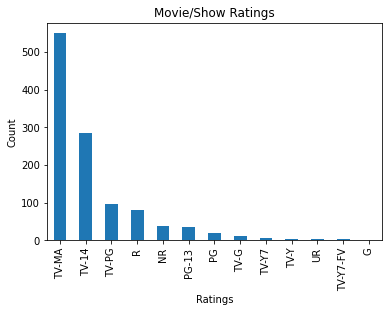

In [39]:
netflix_current['rating'].value_counts().plot(kind='bar')
netflix_current = netflix_current['rating'].value_counts().plot(kind='bar')
netflix_current.set_title("Movie/Show Ratings")
netflix_current.set_xlabel("Ratings")
netflix_current.set_ylabel("Count")

### Relationship analsis

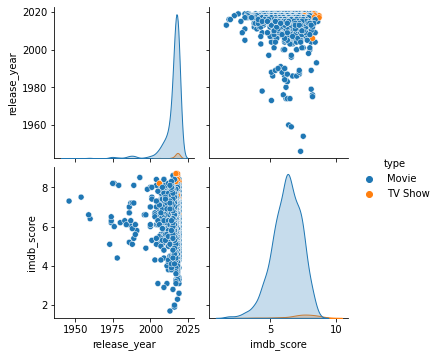

In [40]:
sns.pairplot(netflix, hue = 'type')

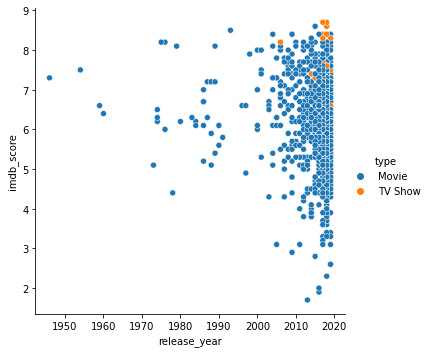

In [41]:
sns.relplot(x='release_year',y='imdb_score',hue='type',data=netflix)

/var/folders/7y/95y2flc95xd_kqlcm2mtqjp00000gn/T/ipykernel_20291/687754911.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(netflix['release_year'])


<AxesSubplot:xlabel='release_year', ylabel='Density'>

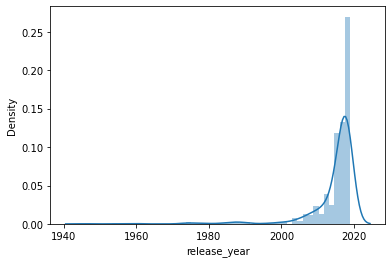

In [42]:
sns.distplot(netflix['release_year'])

### Top Directors 

In [43]:
netflix.director.value_counts()

Raúl Campos, Jan Suter    12
Marcus Raboy              10
Jay Chapman               10
Jay Karas                 10
Ryan Polito                7
                          ..
Noor Imran Mithu           1
Ísold Uggadóttir           1
Genevieve Nnaji            1
Wim Wenders                1
Icíar Bollaín              1
Name: director, Length: 928, dtype: int64

### Average imdb scores through the years

In [44]:
netflix.groupby(['release_year'])['imdb_score'].mean()

release_year
1946    7.300000
1954    7.500000
1959    6.600000
1960    6.400000
1973    5.100000
1974    6.333333
1975    8.200000
1976    7.100000
1978    4.400000
1979    8.100000
1980    6.200000
1983    6.300000
1984    6.150000
1986    6.340000
1987    6.750000
1988    6.066667
1989    6.900000
1990    5.933333
1991    5.800000
1993    8.500000
1996    6.600000
1997    5.750000
1998    7.900000
2000    6.820000
2001    7.050000
2003    6.025000
2004    6.837500
2005    6.314286
2006    7.136364
2007    6.320000
2008    7.047368
2009    6.365000
2010    6.815789
2011    6.266667
2012    6.242424
2013    6.212903
2014    6.473171
2015    6.392647
2016    6.313846
2017    6.160633
2018    6.179323
2019    6.082514
Name: imdb_score, dtype: float64

In [45]:
netflix.groupby(['release_year', 'type'])['imdb_score'].mean()

release_year  type   
1946          Movie      7.300000
1954          Movie      7.500000
1959          Movie      6.600000
1960          Movie      6.400000
1973          Movie      5.100000
1974          Movie      6.333333
1975          Movie      8.200000
1976          Movie      7.100000
1978          Movie      4.400000
1979          Movie      8.100000
1980          Movie      6.200000
1983          Movie      6.300000
1984          Movie      6.150000
1986          Movie      6.340000
1987          Movie      6.750000
1988          Movie      6.066667
1989          Movie      6.900000
1990          Movie      5.933333
1991          Movie      5.800000
1993          Movie      8.500000
1996          Movie      6.600000
1997          Movie      5.750000
1998          Movie      7.900000
2000          Movie      6.820000
2001          Movie      7.050000
2003          Movie      6.025000
2004          Movie      6.837500
2005          Movie      6.314286
2006          Movie      7

In [46]:
### It appears that Tv shows on average have higher imdb scores than the Movies

In [47]:
netflix.groupby(['type'])['imdb_score'].mean()

type
Movie      6.238027
TV Show    7.420000
Name: imdb_score, dtype: float64

## Q1 Do ratings affect imdb score?

## One Way Between Subjects ANOVA

### Import additional packages 

In [48]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

### Load data

In [49]:
netflix.head()

,title,director,cast,country,release_year,rating,duration,genre,type,imdb_score
0,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",India,2019,TV-14,135 min,"Comedies, Dramas, International Movies",Movie,4.3
1,Atlantics,Mati Diop,"Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...","France, Senegal, Belgium",2019,TV-14,106 min,"Dramas, Independent Movies, International Movies",Movie,6.7
2,I Lost My Body,Jérémy Clapin,"Hakim Faris, Victoire Du Bois, Patrick d'Assum...",France,2019,TV-MA,81 min,"Dramas, Independent Movies, International Movies",Movie,7.5
3,Holiday Rush,Leslie Small,"Romany Malco, Sonequa Martin-Green, Darlene Lo...",United States,2019,TV-PG,94 min,"Children & Family Movies, Dramas",Movie,4.9
4,Evvarikee Cheppoddu,Basava Shankar Eeday,"Rakesh Varre, Gargeyi, Vamsi raj Nekkanti, D P...",India,2019,TV-14,134 min,"Comedies, International Movies, Romantic Movies",Movie,7.2


### Data Wrangling

#### Only keep 2 variables interested in 

In [50]:
netflix1 = netflix[['imdb_score', 'rating']]

#### Recode IV to numeric

In [51]:
netflix1.rating.value_counts()

TV-MA       550
TV-14       285
TV-PG        98
R            82
NR           38
PG-13        36
PG           20
TV-G         11
TV-Y7         7
TV-Y          4
UR            4
TV-Y7-FV      3
G             2
Name: rating, dtype: int64

In [52]:
def recode(series):
    if series == "TV-MA":
        return 0
    if series == "TV-14": 
        return 1
    if series == "TV-PG": 
        return 2
    if series == "R": 
        return 3
    if series == "NR":
        return 4
    if series == "PG-13": 
        return 5
    if series == "PG": 
        return 6
    if series == "TV-G": 
        return 7
    if series == "TV-Y7":
        return 8
    if series == "TV-Y": 
        return 9
    if series == "UR": 
        return 10
    if series == "TV-Y7-FV": 
        return 11
    if series == "G":
        return 12
 
netflix1["ratingR"] = netflix1["rating"].apply(recode)

/var/folders/7y/95y2flc95xd_kqlcm2mtqjp00000gn/T/ipykernel_20291/2919202148.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix1["ratingR"] = netflix1["rating"].apply(recode)


In [53]:
netflix1.head()

,imdb_score,rating,ratingR
0,4.3,TV-14,1
1,6.7,TV-14,1
2,7.5,TV-MA,0
3,4.9,TV-PG,2
4,7.2,TV-14,1


### Test Assumptions

#### Normailty

/var/folders/7y/95y2flc95xd_kqlcm2mtqjp00000gn/T/ipykernel_20291/893475539.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(netflix1['imdb_score'])


<AxesSubplot:xlabel='imdb_score', ylabel='Density'>

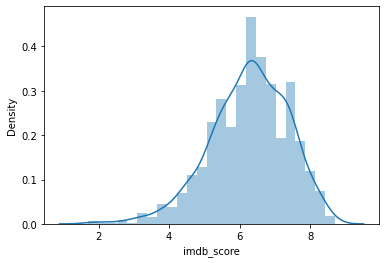

In [54]:
sns.distplot(netflix1['imdb_score'])

In [55]:
## This is pretty clearly normally distributed

In [56]:
netflix1['imdbSQRT'] = np.sqrt(netflix1['imdb_score'])

/var/folders/7y/95y2flc95xd_kqlcm2mtqjp00000gn/T/ipykernel_20291/2968455498.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix1['imdbSQRT'] = np.sqrt(netflix1['imdb_score'])


In [57]:
netflix1.head()

,imdb_score,rating,ratingR,imdbSQRT
0,4.3,TV-14,1,2.073644
1,6.7,TV-14,1,2.588436
2,7.5,TV-MA,0,2.738613
3,4.9,TV-PG,2,2.213594
4,7.2,TV-14,1,2.683282


/var/folders/7y/95y2flc95xd_kqlcm2mtqjp00000gn/T/ipykernel_20291/2733054470.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(netflix1['imdbSQRT'])


<AxesSubplot:xlabel='imdbSQRT', ylabel='Density'>

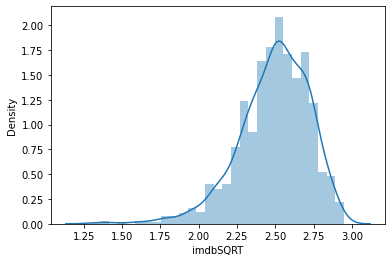

In [58]:
sns.distplot(netflix1['imdbSQRT'])

In [59]:
## Now looks even more normally distributed

### Homogeneity of Varience

In [60]:
## Perform Bartlett's test due to being normally distributed

In [61]:
scipy.stats.bartlett(netflix1['imdbSQRT'],netflix1['ratingR'])

BartlettResult(statistic=3263.7098133249488, pvalue=0.0)

In [62]:
## Because p value <.05, Test violated the assumption of homogeneity of variance.

In [63]:
## Try out Fligner's test

In [64]:
scipy.stats.fligner(netflix1['imdbSQRT'], netflix1['ratingR'])

FlignerResult(statistic=570.1451129788373, pvalue=5.2209642365450515e-126)

In [65]:
## P value  <.05, So test failed the assumption of homogeneity of variance as well.

In [66]:
## This violation cannot be corrected in Python, I will look into this test in R

## Variables are not closely related, however because both the Bartlett's and the Fligner's test violated the assumption of homogeneity of variance I would want to analyze this a little bit more closely because of the possiblility of a slight closer connection. (Analyze in R for more accuracy)

### Sample Size

In [67]:
netflix1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1140 entries, 0 to 1139
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   imdb_score  1140 non-null   float64
 1   rating      1140 non-null   object 
 2   ratingR     1140 non-null   int64  
 3   imdbSQRT    1140 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 35.8+ KB


In [68]:
## Over 20 values, So met the requirements for sample size

### Independence 

In [69]:
## No statistical test for independence

## Running the Analysis

In [70]:
netflix1.rating.value_counts()

TV-MA       550
TV-14       285
TV-PG        98
R            82
NR           38
PG-13        36
PG           20
TV-G         11
TV-Y7         7
TV-Y          4
UR            4
TV-Y7-FV      3
G             2
Name: rating, dtype: int64

In [71]:
netflix1.imdbSQRT.unique()

array([2.07364414, 2.58843582, 2.73861279, 2.21359436, 2.68328157,
       2.62678511, 2.79284801, 2.77488739, 2.19089023, 2.34520788,
       2.56904652, 2.88097206, 2.64575131, 2.82842712, 2.54950976,
       1.76068169, 2.66458252, 2.30217289, 2.42899156, 2.84604989,
       2.40831892, 2.14476106, 2.7202941 , 1.84390889, 2.48997992,
       1.94935887, 2.46981781, 2.50998008, 2.38746728, 2.70185122,
       2.12132034, 2.36643191, 2.52982213, 2.28035085, 2.32379001,
       2.0976177 , 2.16794834, 2.86356421, 2.81069386, 2.60768096,
       2.23606798, 2.25831796, 2.89827535, 1.81659021, 1.61245155,
       2.75680975, 1.97484177, 2.44948974, 1.37840488, 2.04939015,
       2.        , 1.92353841, 2.93257566, 2.91547595, 1.8973666 ,
       2.02484567, 1.30384048, 1.70293864, 1.51657509, 2.94957624,
       1.41421356, 1.78885438, 1.67332005])

In [72]:
netflix1.ratingR.unique()

array([ 1,  0,  2,  3,  9,  5,  6,  7, 10,  8,  4, 12, 11])

In [73]:
stats.f_oneway(netflix1['imdb_score'][netflix1['rating']=='TV-MA'],
                       netflix1['imdb_score'][netflix1['rating']=='TV-14'],
                       netflix1['imdb_score'][netflix1['rating']=='TV-PG'],
                       netflix1['imdb_score'][netflix1['rating']=='R'],
                       netflix1['imdb_score'][netflix1['rating']=='NR'],
                       netflix1['imdb_score'][netflix1['rating']=='PG-13'],
                       netflix1['imdb_score'][netflix1['rating']=='PG'],
                       netflix1['imdb_score'][netflix1['rating']=='TV-G'],
                       netflix1['imdb_score'][netflix1['rating']=='TV-Y7'],
                       netflix1['imdb_score'][netflix1['rating']=='TV-Y'],
                       netflix1['imdb_score'][netflix1['rating']=='UR'],
                       netflix1['imdb_score'][netflix1['rating']=='TV-Y7-FV'],
                       netflix1['imdb_score'][netflix1['rating']=='G'])

F_onewayResult(statistic=1.9450021563139994, pvalue=0.026044429519468917)

In [74]:
## Since the p value is less than .05, there is a significant difference in rating and imdb scores

## Computing Post Hoc with turkey

In [75]:
postHoc = MultiComparison(netflix1['imdbSQRT'], netflix1['rating'])
postHocResults = postHoc.tukeyhsd()
print(postHocResults)

  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1   group2  meandiff p-adj   lower  upper  reject
-------------------------------------------------------
       G       NR   0.3515 0.6621 -0.2034 0.9064  False
       G       PG   0.1497 0.9997 -0.4176 0.7169  False
       G    PG-13   0.2984 0.8583 -0.2573  0.854  False
       G        R   0.2557  0.944 -0.2917 0.8031  False
       G    TV-14   0.2366 0.9667 -0.3062 0.7793  False
       G     TV-G   0.2082 0.9942 -0.3797 0.7962  False
       G    TV-MA   0.2709   0.91 -0.2709 0.8127  False
       G    TV-PG   0.2922 0.8617 -0.2542 0.8385  False
       G     TV-Y    0.212 0.9978 -0.4504 0.8744  False
       G    TV-Y7   0.2377 0.9872 -0.3756 0.8509  False
       G TV-Y7-FV   0.0203    1.0 -0.6779 0.7186  False
       G       UR   0.2864 0.9687  -0.376 0.9488  False
      NR       PG  -0.2018 0.0779 -0.4131 0.0095  False
      NR    PG-13  -0.0531 0.9989  -0.231 0.1248  False
      NR        R  -0.0958  0.651 -0.2459 0.0543

### These false values in the rejects column tell me that we would accept the null hypothesis because there is not a significant difference between imdb scores and ratings

## Determine Means and Draw Conclusions

In [76]:
netflix1.groupby('rating').mean()

,imdb_score,ratingR,imdbSQRT
rating,,,
G,5.050000,12.0,2.229669
NR,6.694737,4.0,2.581146
PG,5.775000,6.0,2.379332
PG-13,6.438889,5.0,2.528021
R,6.243902,3.0,2.485370
TV-14,6.141754,1.0,2.466232
TV-G,6.009091,7.0,2.437892
TV-MA,6.299636,0.0,2.500583
TV-PG,6.409184,2.0,2.521838


### We can confirm here that there is not a significant difference between imdb scores amongst the different ratings

## Q2 How do ratings for content released in the United states differ from those released in India?

## Independent Chi-Square

### Load data

In [77]:
netflix.head()

,title,director,cast,country,release_year,rating,duration,genre,type,imdb_score
0,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",India,2019,TV-14,135 min,"Comedies, Dramas, International Movies",Movie,4.3
1,Atlantics,Mati Diop,"Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...","France, Senegal, Belgium",2019,TV-14,106 min,"Dramas, Independent Movies, International Movies",Movie,6.7
2,I Lost My Body,Jérémy Clapin,"Hakim Faris, Victoire Du Bois, Patrick d'Assum...",France,2019,TV-MA,81 min,"Dramas, Independent Movies, International Movies",Movie,7.5
3,Holiday Rush,Leslie Small,"Romany Malco, Sonequa Martin-Green, Darlene Lo...",United States,2019,TV-PG,94 min,"Children & Family Movies, Dramas",Movie,4.9
4,Evvarikee Cheppoddu,Basava Shankar Eeday,"Rakesh Varre, Gargeyi, Vamsi raj Nekkanti, D P...",India,2019,TV-14,134 min,"Comedies, International Movies, Romantic Movies",Movie,7.2


## Test Assumptions and Run the Analysis

### Create a Contingency Table for United States

In [78]:
netflix_crosstab = pd.crosstab(netflix['rating'],[netflix.country.str.contains('United States')])

In [79]:
netflix_crosstab

country,False,True
rating,,
G,0,2
NR,14,24
PG,9,11
PG-13,10,26
R,12,70
TV-14,225,60
TV-G,2,9
TV-MA,306,244
TV-PG,59,39


### With this crosstab I can already determine a few factors. I can interpret here that out of the total content count of 493 in the USA, Nearly half of that content is rated TV-MA and none are TV-Y7-FV 

### Running the Independent Chi-Square

In [80]:
stats.chi2_contingency(netflix_crosstab)

(150.09708901274172,
 5.418450675820066e-26,
 12,
 array([[  1.13508772,   0.86491228],
        [ 21.56666667,  16.43333333],
        [ 11.35087719,   8.64912281],
        [ 20.43157895,  15.56842105],
        [ 46.53859649,  35.46140351],
        [161.75      , 123.25      ],
        [  6.24298246,   4.75701754],
        [312.14912281, 237.85087719],
        [ 55.61929825,  42.38070175],
        [  2.27017544,   1.72982456],
        [  3.97280702,   3.02719298],
        [  1.70263158,   1.29736842],
        [  2.27017544,   1.72982456]]))

### With the P value here we can see that there is a significant relationship between ratings released in USA

### Create a Contingency Table for India

In [81]:
netflix_crosstab1 = pd.crosstab(netflix['rating'],[netflix.country.str.contains('India')])

In [82]:
netflix_crosstab1

country,False,True
rating,,
G,2,0
NR,35,3
PG,19,1
PG-13,32,4
R,81,1
TV-14,158,127
TV-G,11,0
TV-MA,478,72
TV-PG,61,37


### Here I can see that unlike the US, Indias content is mostly rated TV-14 and they do have a title rated TV-Y7-FV

### Running the Independent Chi-Square

In [83]:
stats.chi2_contingency(netflix_crosstab1)

(163.78511152550038,
 8.88297759358946e-29,
 12,
 array([[  1.56666667,   0.43333333],
        [ 29.76666667,   8.23333333],
        [ 15.66666667,   4.33333333],
        [ 28.2       ,   7.8       ],
        [ 64.23333333,  17.76666667],
        [223.25      ,  61.75      ],
        [  8.61666667,   2.38333333],
        [430.83333333, 119.16666667],
        [ 76.76666667,  21.23333333],
        [  3.13333333,   0.86666667],
        [  5.48333333,   1.51666667],
        [  2.35      ,   0.65      ],
        [  3.13333333,   0.86666667]]))

### Again we can see here that there is a significance  between ratings and India

## All in all I would speculate that depending on the country content is released in certain rated films and shows will be more vastly release over others and some not at all